# Plot bri1-T DEGs results on umap projection

In [1]:
library(tidyverse)
library(Seurat)
library(cowplot)
library(ComplexHeatmap)
library(circlize)
library(GeneOverlap)
library(gprofiler2)
library(ggrepel)
library(muscat)
library(purrr)
library(limma)
library(scran)
library(future)
library(patchwork)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'spatstat.geom':
  method     from
  print.boxx cli 

Attaching SeuratObject

Loading required package: grid

ComplexHeatmap version 2.11.1
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://jokergoo.github.io/ComplexHeatmap-reference

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

The new InteractiveComplexHeatmap package can directly export static 
complex hea

In [2]:
sessionInfo()

R version 4.0.0 (2020-04-24)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 16.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/tmnolan7/anaconda3/envs/r_4/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] parallel  stats4    grid      stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] patchwork_1.1.0             future_1.22.1              
 [3] scran_1.16.0                SingleCellExperiment_1.12.0
 [5] SummarizedExperiment_1.20.0 Biobase_2.50.0             
 [7] GenomicRanges_1.42.0        GenomeInfoDb_1.26.7        
 [9] IRanges_2.24.1   

In [3]:
#for 200gb ram 
options(future.globals.maxSize = 200000 * 1024^2)

In [4]:
rc.integrated <- readRDS("../data/integrations/rc.integrated_15S_BRZ_bri1_Li_seu3_clean.rds")

In [5]:
# all bri1-T vs WT DEG results
all_bg <- read_csv("./output/v4_all_bri1_T_v_WT_cell_time_EdgeR_q0.05_FC1.5_r_v_4_20220112.csv")
# only DEGs
sig_DE_fil <- read_csv("./output/v4_bri1_T_v_WT_cell_time_EdgeR_q0.05_FC1.5_r_v_4_20220112.csv")


Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  gene = col_character(),
  cluster_id = col_character(),
  contrast = col_character(),
  clust_gene = col_character(),
  Name = col_character(),
  DE = col_logical(),
  up_dn_label = col_character(),
  clust_up_dn = col_character()
)
ℹ Use `spec()` for the full column specifications.


Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  gene = col_character(),
  cluster_id = col_character(),
  contrast = col_character(),
  Name = col_character(),
  TF_Name = col_character(),
  Description = col_character(),
  up_dn_label = col_character(),
  clust_up_dn = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [6]:
# numbers of genes to add as metadata
bri1_total_n <- sig_DE_fil %>% select(cluster_id, gene) %>% group_by(cluster_id) %>% tally(name = "bri1_T_total_DE")

bri1_up_n <- sig_DE_fil %>% filter(up_dn_label=="Up") %>% 
 select(cluster_id, gene) %>% group_by(cluster_id) %>% tally(name = "bri1_T_Up")

bri1_dn_n <- sig_DE_fil %>% filter(up_dn_label=="Down") %>% 
 select(cluster_id, gene) %>% group_by(cluster_id) %>% tally(name = "bri1_T_Down")

In [7]:
# add pGL2 DE genes
GL2_v_WT_sig_DE_fil <- read_csv("./output/v4_pGL2-BRI1-bri1_T_v_WT_cell_time_EdgeR_q0.05_FC1.5_r_v_4_20220112.csv")

# numbers of genes to add as metadata

GL2_v_WT_total_n <- GL2_v_WT_sig_DE_fil  %>% select(cluster_id, gene) %>% group_by(cluster_id) %>% tally(name = "pGL2_v_WT_total_DE")

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  gene = col_character(),
  cluster_id = col_character(),
  contrast = col_character(),
  Name = col_character(),
  TF_Name = col_character(),
  Description = col_character(),
  up_dn_label = col_character(),
  clust_up_dn = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [8]:
GL2_v_bri1_sig_DE_fil <- read_csv("./output/v4_pGL2-BRI1-bri1_T_v_bri1-T_cell_time_EdgeR_q0.05_FC1.5_r_v_4_20220112.csv")

# numbers of genes to add as metadata

GL2_v_bri1_total_n <- GL2_v_bri1_sig_DE_fil  %>% select(cluster_id, gene) %>% group_by(cluster_id) %>% tally(name = "pGL2_v_bri1_total_DE")

Warning message:
“Missing column names filled in: 'X1' [1]”

── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  gene = col_character(),
  cluster_id = col_character(),
  contrast = col_character(),
  Name = col_character(),
  TF_Name = col_character(),
  Description = col_character(),
  up_dn_label = col_character(),
  clust_up_dn = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [10]:
(de_meta_for_umap <- data.frame("barcode"=colnames(rc.integrated), 
                               "cluster_id"=rc.integrated$time_zone_cell_type))

,barcode,cluster_id
,<chr>,<chr>
AAACCCAAGCTGACCC_4,AAACCCAAGCTGACCC_4,Distal Columella
AAACCCAAGGTGCGAT_4,AAACCCAAGGTGCGAT_4,Elongation_Phloem
AAACCCACAAACTAGA_4,AAACCCACAAACTAGA_4,Elongation_Endodermis
AAACCCACAAGATCCT_4,AAACCCACAAGATCCT_4,Elongation_Xylem
AAACCCACACATATCG_4,AAACCCACACATATCG_4,Elongation_Trichoblast
AAACCCAGTGCCTTCT_4,AAACCCAGTGCCTTCT_4,Elongation_Pericycle
AAACCCATCCCGAACG_4,AAACCCATCCCGAACG_4,Maturation_Trichoblast
AAACGAAAGAATCCCT_4,AAACGAAAGAATCCCT_4,Elongation_Cortex
AAACGAAAGCAAGCCA_4,AAACGAAAGCAAGCCA_4,Proximal Lateral Root Cap


In [11]:
(de_meta_for_umap <- left_join(de_meta_for_umap, bri1_total_n) %>%
                    left_join(bri1_up_n) %>%
                    left_join(bri1_dn_n) %>%
                    left_join(GL2_v_WT_total_n) %>%
                    left_join(GL2_v_bri1_total_n))

Joining, by = "cluster_id"

Joining, by = "cluster_id"

Joining, by = "cluster_id"

Joining, by = "cluster_id"

Joining, by = "cluster_id"



barcode,cluster_id,bri1_T_total_DE,bri1_T_Up,bri1_T_Down,pGL2_v_WT_total_DE,pGL2_v_bri1_total_DE
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
AAACCCAAGCTGACCC_4,Distal Columella,1036,516,520,320,477
AAACCCAAGGTGCGAT_4,Elongation_Phloem,497,299,198,29,248
AAACCCACAAACTAGA_4,Elongation_Endodermis,3141,1591,1550,2265,2077
AAACCCACAAGATCCT_4,Elongation_Xylem,1384,709,675,680,655
AAACCCACACATATCG_4,Elongation_Trichoblast,1360,651,709,392,576
AAACCCAGTGCCTTCT_4,Elongation_Pericycle,1349,896,453,1291,2447
AAACCCATCCCGAACG_4,Maturation_Trichoblast,2848,1209,1639,1076,NA
AAACGAAAGAATCCCT_4,Elongation_Cortex,2765,1131,1634,1252,1271
AAACGAAAGCAAGCCA_4,Proximal Lateral Root Cap,1513,719,794,1564,1145


In [12]:
# replace NA with zero for catagories that were too small to test 

de_meta_for_umap[is.na(de_meta_for_umap)] <- 0

In [13]:
# add metadata to Seurat object

total_de_meta <- de_meta_for_umap$bri1_T_total_DE
names(total_de_meta) <- colnames(rc.integrated)

rc.integrated <- AddMetaData(
  object = rc.integrated,
  metadata = total_de_meta,
  col.name = 'bri1_T_total_DE')

up_de_meta <- de_meta_for_umap$bri1_T_Up
names(up_de_meta) <- colnames(rc.integrated)

rc.integrated <- AddMetaData(
  object = rc.integrated,
  metadata = up_de_meta,
  col.name = 'bri1_T_Up')


dn_de_meta <- de_meta_for_umap$bri1_T_Down
names(dn_de_meta) <- colnames(rc.integrated)

rc.integrated <- AddMetaData(
  object = rc.integrated,
  metadata = dn_de_meta,
  col.name = 'bri1_T_Down')

GL2_v_WT_total_de_meta <- de_meta_for_umap$pGL2_v_WT_total_DE
names(GL2_v_WT_total_de_meta) <- colnames(rc.integrated)

rc.integrated <- AddMetaData(
  object = rc.integrated,
  metadata = GL2_v_WT_total_de_meta,
  col.name = 'pGL2_v_WT_total_DE')

GL2_v_bri1_total_de_meta <- de_meta_for_umap$pGL2_v_bri1_total_DE
names(GL2_v_bri1_total_de_meta) <- colnames(rc.integrated)

rc.integrated <- AddMetaData(
  object = rc.integrated,
  metadata = GL2_v_bri1_total_de_meta,
  col.name = 'pGL2_v_bri1_total_DE')



In [14]:

bri1_de_plt <- FeaturePlot(rc.integrated, 
                         features = c("bri1_T_total_DE"), 
                         max.cutoff = 2000, 
                         label=F, 
                         order = T, 
                         cols=c("beige", "#01665e"), 
                         pt.size = 0.5) + 
                            ggtitle("Total bri1-T DE genes") +  
                            theme_void(base_size = 16) + 
                            theme(plot.title = element_text(hjust = 0.5)) +
                                 labs(color="# genes") +  theme(plot.margin = margin(0.5,0.5,0.5,0.5, "cm"))


GL2_v_WT_de_plt <- FeaturePlot(rc.integrated, 
                         features = c("pGL2_v_WT_total_DE"), 
                         max.cutoff = 2000, 
                         label=F, 
                         order = T, 
                         cols=c("beige", "#01665e"), 
                         pt.size = 0.5) + 
                            ggtitle("Total pGL2 vs WT DE genes") +  
                            theme_void(base_size = 16) + 
                            theme(plot.title = element_text(hjust = 0.5)) +
                                 labs(color="# genes") +  theme(plot.margin = margin(0.5,0.5,0.5,0.5, "cm"))



GL2_v_bri1_de_plt <- FeaturePlot(rc.integrated, 
                         features = c("pGL2_v_bri1_total_DE"), 
                         max.cutoff = 2000, 
                         label=F, 
                         order = T, 
                         cols=c("beige", "#01665e"), 
                         pt.size = 0.5) + 
                            ggtitle("Total pGL2 vs bri1-T DE genes") +  
                            theme_void(base_size = 16) + 
                            theme(plot.title = element_text(hjust = 0.5)) +
                                 labs(color="# genes") +  theme(plot.margin = margin(0.5,0.5,0.5,0.5, "cm"))



bri1_up_plt <- FeaturePlot(rc.integrated, 
                         features = c("bri1_T_Up"), 
                         max.cutoff = 1000, 
                         label=F, order = T, 
                         cols=c("beige", "red"), 
                         pt.size = 0.5) + 
                            ggtitle("bri1-T up-regulated genes") +  
                            theme_void(base_size = 16) + 
                            theme(plot.title = element_text(hjust = 0.5)) +
                                 labs(color="# genes") +  theme(plot.margin = margin(0.5,0.5,0.5,0.5, "cm"))

bri1_dn_plt <- FeaturePlot(rc.integrated, 
                         features = c("bri1_T_Down"), 
                         max.cutoff = 1000, 
                         label=F, 
                         order = T, 
                         cols=c("beige", "blue"), 
                         pt.size = 0.5) + 
                            ggtitle("bri1-T down-regulated genes") +  
                            theme_void(base_size = 16) + 
                            theme(plot.title = element_text(hjust = 0.5)) +
                                 labs(color="# genes") +  theme(plot.margin = margin(0.5,0.5,0.5,0.5, "cm"))

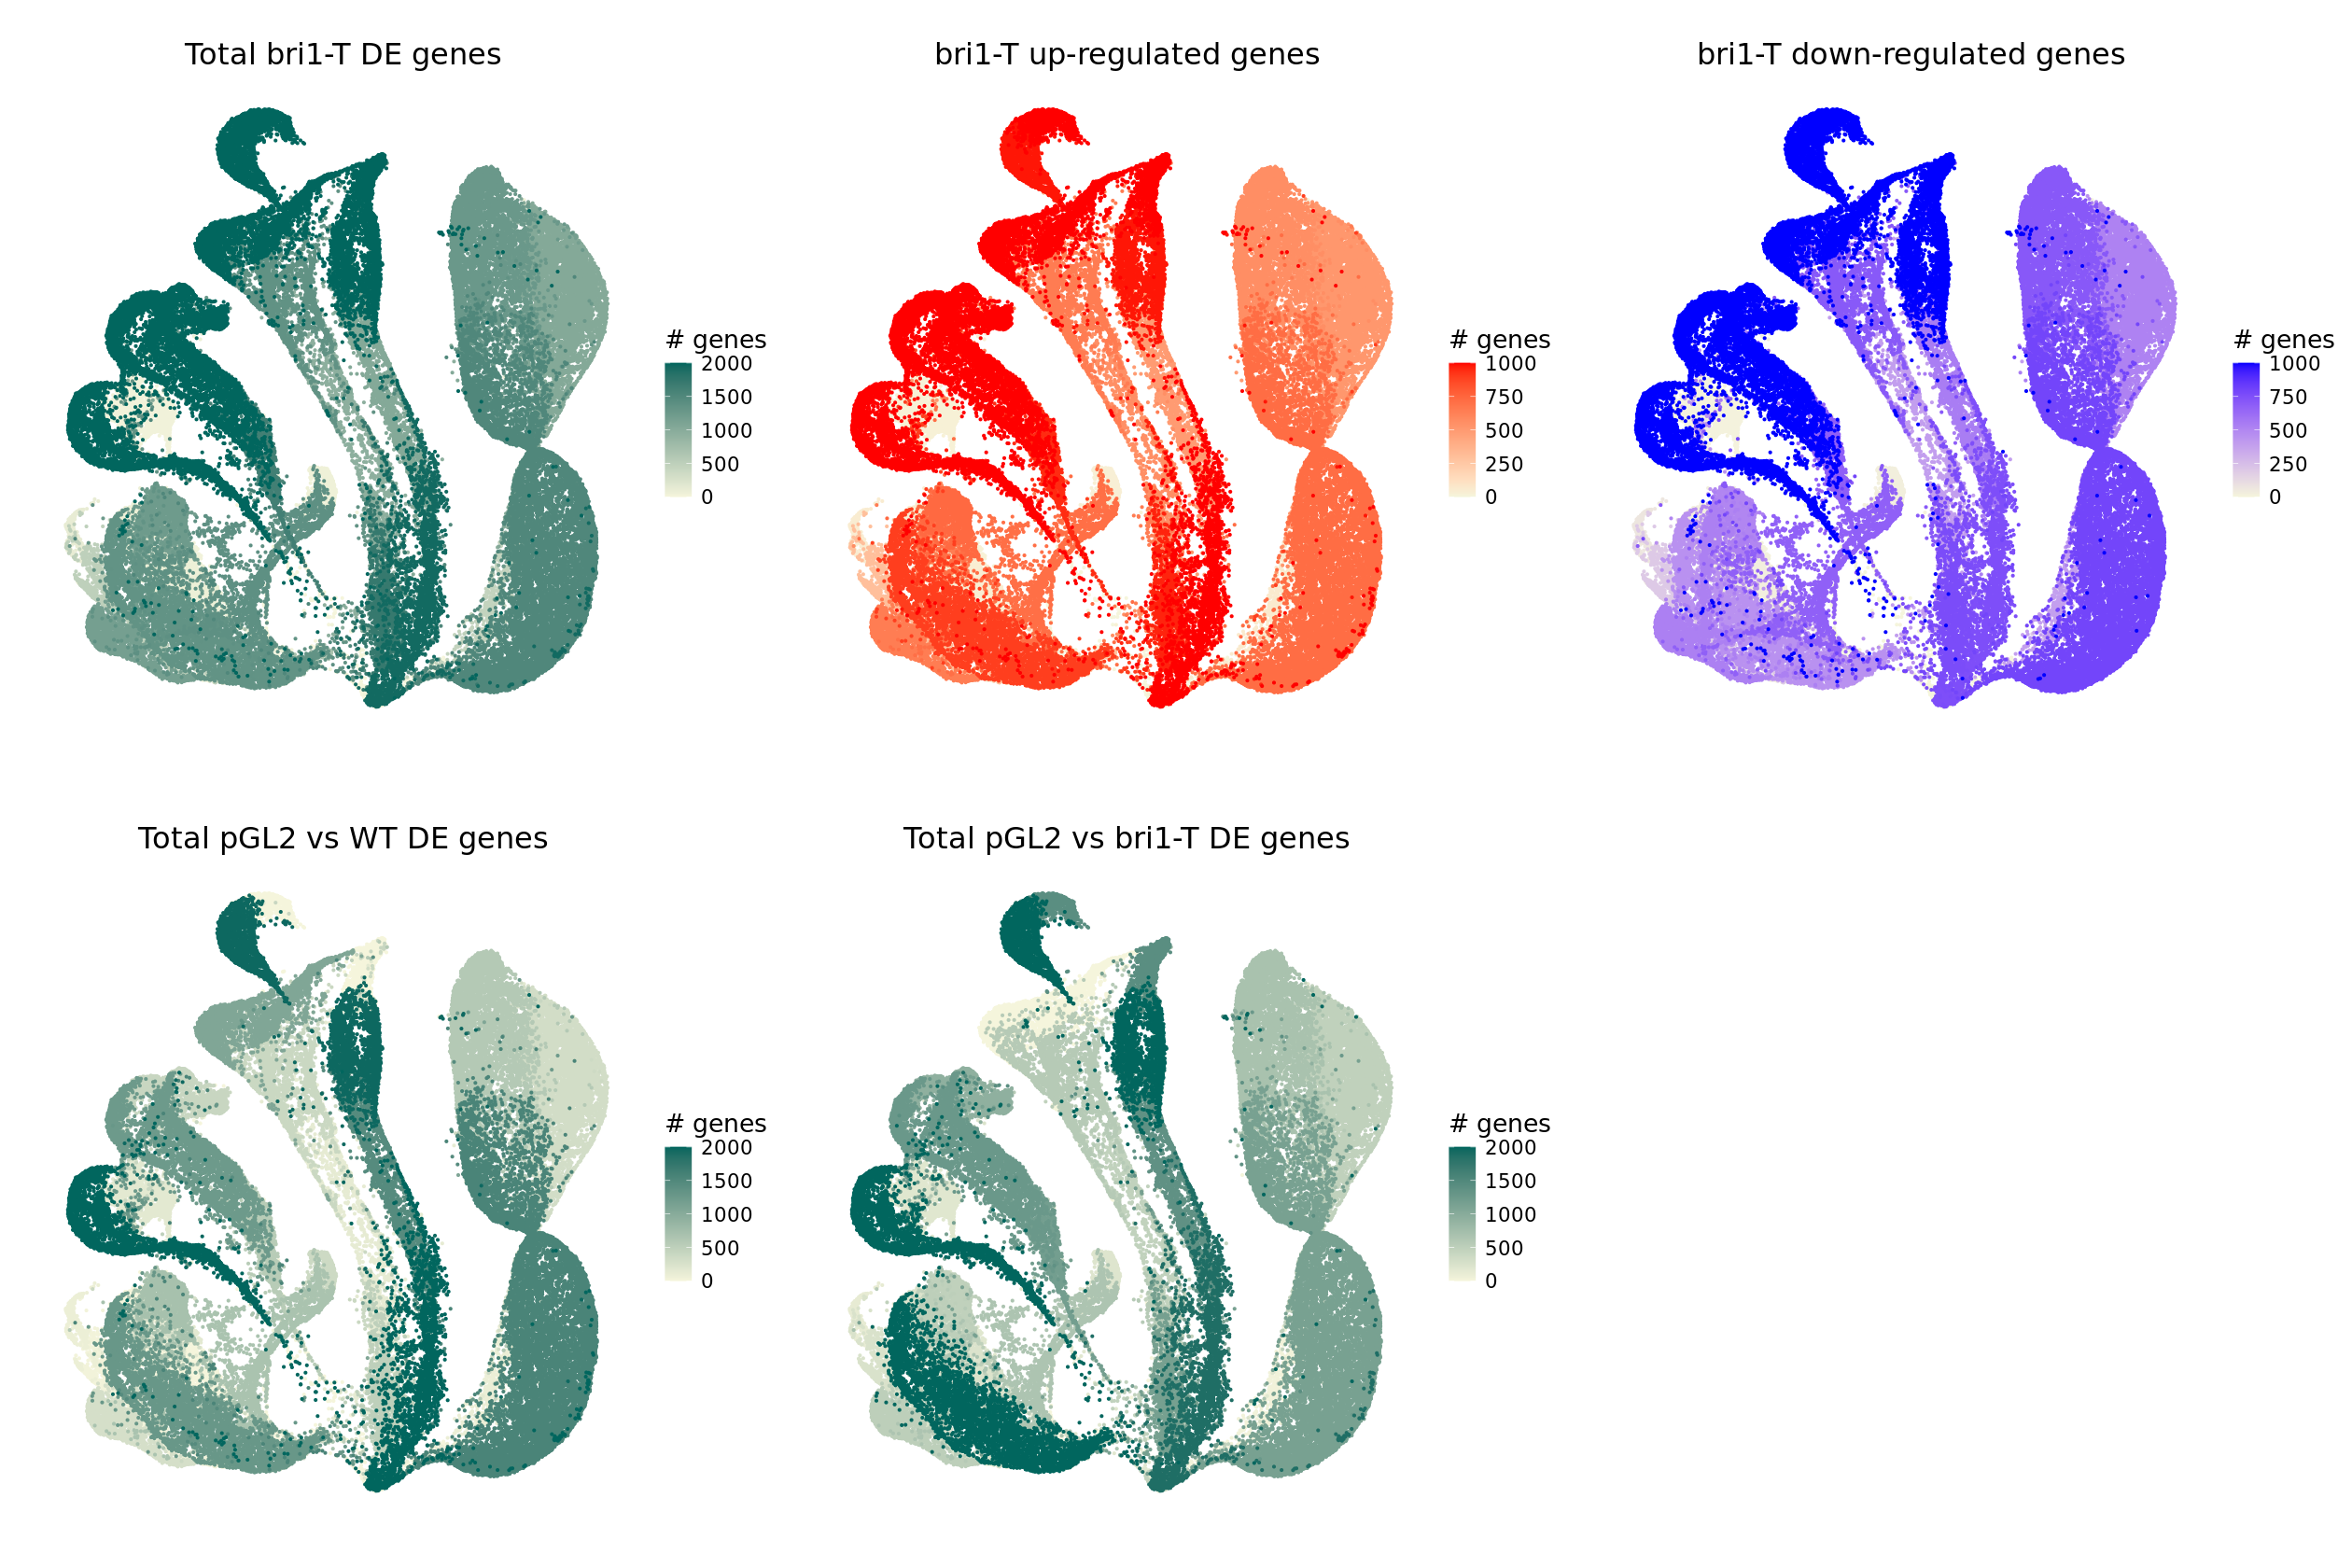

In [15]:
options(repr.plot.width = 21, repr.plot.height = 14)
plot_grid(bri1_de_plt, bri1_up_plt, bri1_dn_plt, GL2_v_WT_de_plt, GL2_v_bri1_de_plt, nrow=2) 


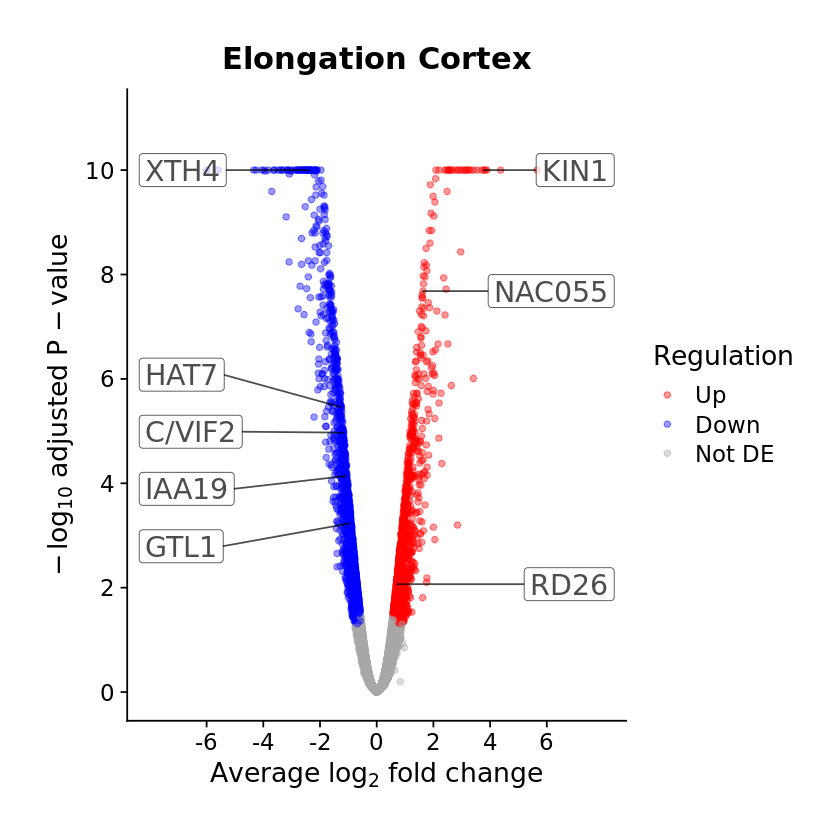

In [16]:
# volcano plot only for elong cortex DEGs in bri1-T vs WT

options(repr.plot.width = 7, repr.plot.height = 7)
cortex_vol <- all_bg %>% filter(cluster_id=="Elongation_Cortex")

cortex_vol <- 
  mutate_at(cortex_vol, "Name", str_replace, "CYP90B1", "DWF4") %>%
mutate_at("Name", str_replace, "AT-GTL1", "GTL1")


cortex_vol <- dplyr::rename(cortex_vol, log2FC=logFC)

cortex_vol$logFDR <- -log10(cortex_vol$p_adj.loc)
# color up/down and facet plot 

# filter(nb_de_total, p_val_adj<=0.05) %>%
# filter(avg_logFC>=log2(1.25) | avg_logFC<=log2(3/4))



cortex_vol$up_dn_label[is.na(cortex_vol$up_dn_label)] <- "Not DE"
cortex_vol$up_dn_label <- factor(cortex_vol$up_dn_label, levels=c("Up", "Down", "Not DE"))


cortex_vol$sig <- cortex_vol$up_dn_label !="Not DE"
# set limits of FC and logFDR
cortex_vol_cut <- cortex_vol
# round to cutoff at 4
cortex_vol_cut$logFDR[cortex_vol_cut$logFDR>10] <- 10

# limit log2FC to 4 
cortex_vol_cut$log2FC[cortex_vol_cut$log2FC>6] <- 6
cortex_vol_cut$log2FC[cortex_vol_cut$log2FC < -6] <- -6

# # labels 


down_genes_to_label <- filter(cortex_vol_cut, gene %in% c("AT5G15150", #HAT7
                                                          "AT1G33240", # GTL1
                                                    "AT5G64620", #C/VIF2
                                                    "AT2G06850", #XTH4
                                                    "AT3G15540" #IAA19
                                                   ))
up_genes_to_label <- filter(cortex_vol_cut, gene %in% c("AT5G15960", #KIN1
                                                    "AT4G27410", #RD26
                                                    "AT3G15500" #NAC055
                                                   ))


p = ggplot(cortex_vol_cut, aes(log2FC, logFDR)) +
  geom_point(aes(col=up_dn_label), alpha = 0.4) +
  scale_color_manual(values=c("red", "blue", "darkgrey")) + 
  scale_x_continuous(limits=c(-8, 8), breaks = c(-6, -4, -2, 0, 2, 4, 6)) + scale_y_continuous(limits=c(0, 11), breaks = c(0, 2, 4, 6, 8, 10)) + 
  xlab(expression(Average~log[2]~fold~change)) + 
  ylab(expression(-log[10]~adjusted~P~-value)) + 
  scale_alpha(guide="none")

all_plot <- p+ geom_label_repel(data=up_genes_to_label, 
                   aes(label=Name), 
                   size = 6, 
                   nudge_x = 11.5, 
                   direction = "y", 
                   alpha = 0.7, box.padding = 0.5) + 
  geom_label_repel(data=down_genes_to_label, 
                   aes(label=Name), 
                   size = 6, 
                   nudge_x = -11.5, 
                   direction = "y", 
                   alpha = 0.7, box.padding = 0.5) +
  labs(color = "Regulation") + ggtitle("") + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))



(cortex_volcano <- all_plot  + ggtitle("Elongation Cortex") + theme_cowplot(font_size = 16) + 
                            theme(plot.title = element_text(hjust = 0.5)) +  theme(plot.margin = margin(1,1,1,1, "cm")))


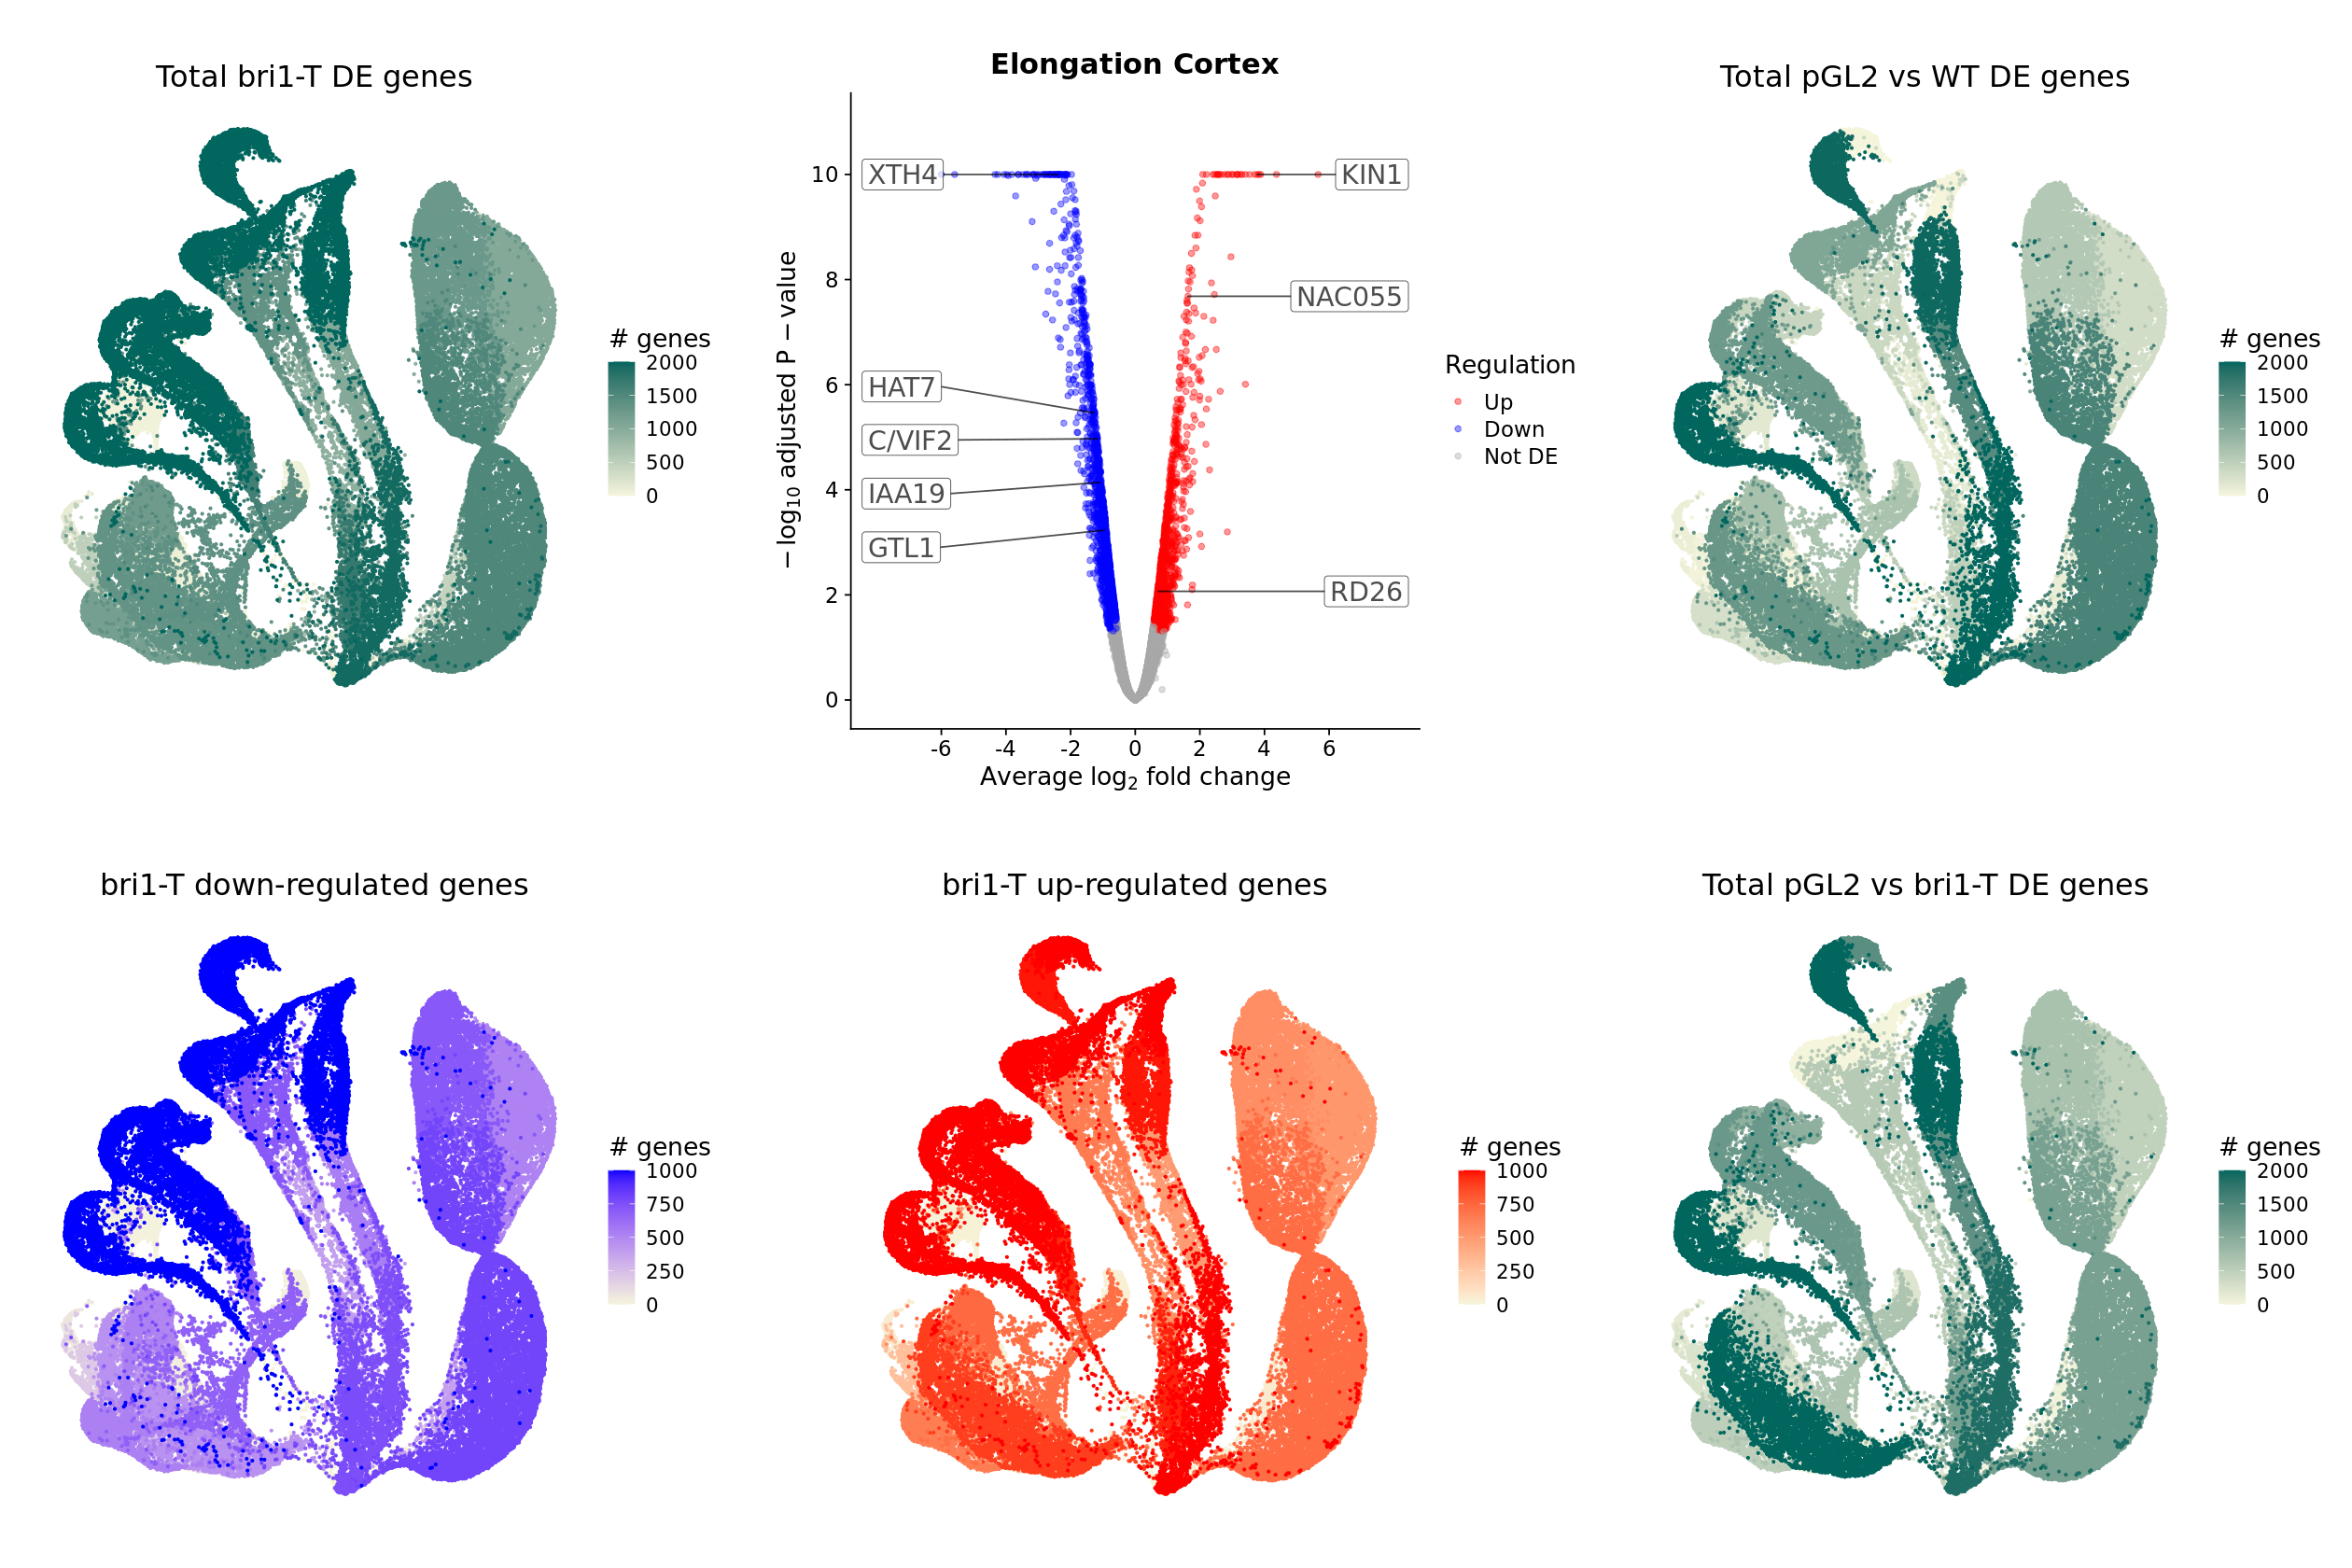

In [18]:
options(repr.plot.width = 21, repr.plot.height = 14)


(DE_and_volcano <- bri1_de_plt + cortex_volcano + GL2_v_WT_de_plt + bri1_dn_plt + 
                               bri1_up_plt + GL2_v_bri1_de_plt +  plot_layout(ncol = 3))


ggsave("./output/bri1_T_DE_genes_on_umap.png", width = 21, height = 14)